In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import time
import sys
import numpy as np
plt.style.use('ggplot')
#plt.style.use('seaborn-ticks')
#plt.style.use('seaborn-notebook')
plt.rcParams['lines.linewidth']=3
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize']=14

#defining dictionary for memory
memory = {}
    
def plot_distribution (data, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False) :
    counts = {}
    for item in data :
        if item not in counts :
            counts [ item ] = 0
        counts [ item ] += 1
    counts = sorted ( counts.items () )
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    ax.scatter ([ k for (k , v ) in counts ] , [ v for (k , v ) in counts ])
    if(len(counts)<20):  # for tiny graph
        showLine=True
    if showLine==True:
        ax.plot ([ k for (k , v ) in counts ] , [ v for (k , v ) in counts ])
    if xlog == True:
        ax.set_xscale ( 'log')
    if ylog == True:
        ax.set_yscale ( 'log')
    if intAxis == True:
        gca = fig.gca()
        gca.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlabel ( xlabel)
    ax.set_ylabel ( ylabel )
    plt.title ( title )
    plt.show()
    #fig.savefig ( "degree_distribution.png" )
    
def plot_degree_bar (G) :
    degs = {}
    for n in G.nodes () :
        deg = G.degree ( n )
        if deg not in degs :
            degs [ deg ] = 0
        degs [ deg ] += 1
    items = sorted ( degs.items () )
    fig = plt.figure ()
    ax = fig.add_subplot (111)
    print(items)
    ax.bar([ k for (k , v ) in items ] , [ v for (k , v ) in items ])
    ax.set_xlabel ( 'Degree ($k$)')
    ax.set_ylabel ( 'Number of nodes with degree $k$ ($N_k$)')
    
    
    
def plot_connected_components(G):
    # Get the connected components of the graph
    Components = snap.TCnComV()
    snap.GetSccs(G, Components)

    # Count the sizes of the connected components
    counts = {}
    for component in Components:
        size = component.Len()
        if size not in counts:
            counts[size] = 0
        counts[size] += 1

    # Sort the counts by component size
    counts = sorted(counts.items())

    # Plot the distribution
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter([k for (k, v) in counts], [v for (k, v) in counts])
    if len(counts) < 20:  # for tiny graph
        ax.plot([k for (k, v) in counts], [v for (k, v) in counts])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Component Size')
    ax.set_ylabel('Count')
    plt.title('Connected Component Sizes')
    plt.show()
    


def plot_distribution_Short(data, xlabel='', ylabel='', title='', xlog=True, ylog=True, showLine=False, intAxis=False):
    counts = {}
    for item in data:
        if item not in counts:
            counts[item] = 0
        counts[item] += 1
    counts = sorted(counts.items())
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter([k for (k, v) in counts], [v for (k, v) in counts])
    if len(counts) < 25:  # for tiny graph
        showLine = True
    if showLine:
        ax.plot([k for (k, v) in counts], [v for (k, v) in counts])
    if intAxis:
        gca = fig.gca()
        gca.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title(title)
    plt.show()

def shortPathLength(Graph):
    avg_shortest_path = []
    num_nodes = Graph.GetNodes()
    for node in Graph.Nodes():
        node_id = node.GetId()
        shortest_paths = snap.TIntH()
        snap.GetShortPath(Graph, node_id, shortest_paths)
        total_shortest_path_length = 0
        for key in shortest_paths:
            total_shortest_path_length += shortest_paths[key]
        avg_shortest_path.append(total_shortest_path_length / (num_nodes - 1))
    return avg_shortest_path


#### Interaction Networks

out.opsahl-southernwomen
Total memory usage of nodes in graph: 864 bytes
Total memory usage of edges in graph: 3744 bytes


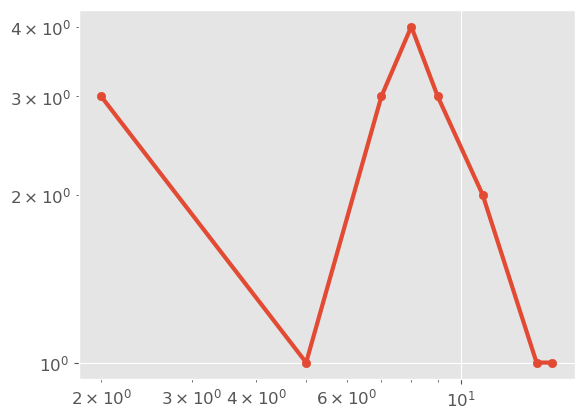

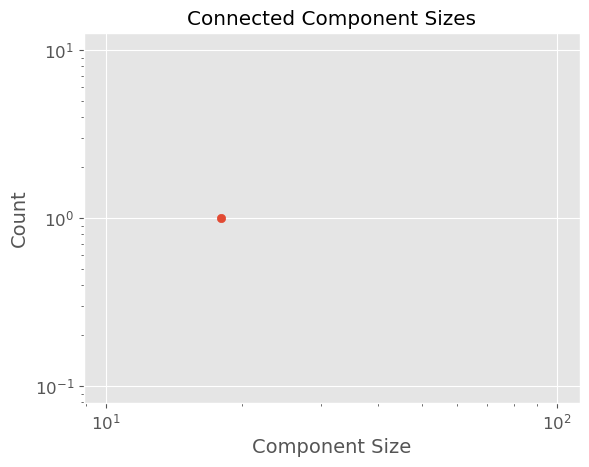

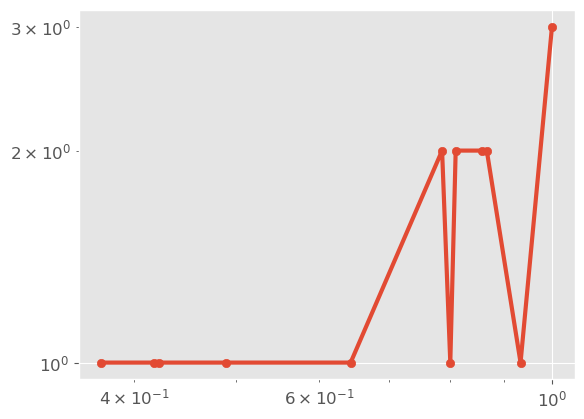

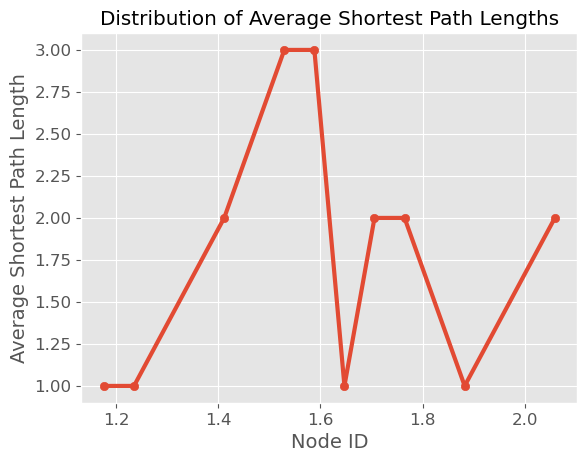

Average Statistics Time:
Degree Time: 0.52342
Connected Component Time: 0.3874
Cluster Coefficient Time: 0.49685
Shortest Path Length Time 0.19438
----------------------------------------------------------------------------------------
out.dimacs10-football
Total memory usage of nodes in graph: 5520 bytes
Total memory usage of edges in graph: 29424 bytes


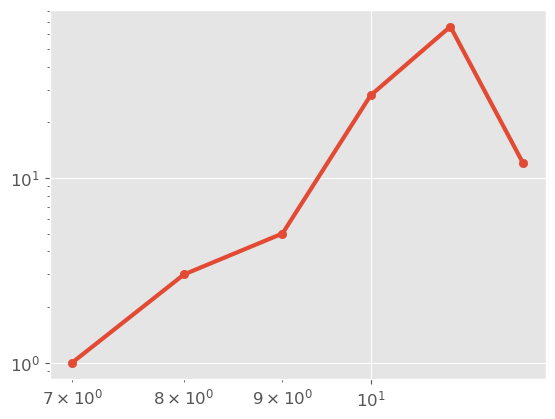

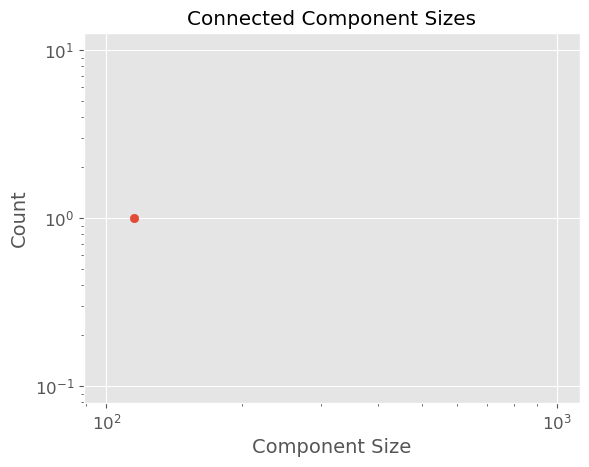

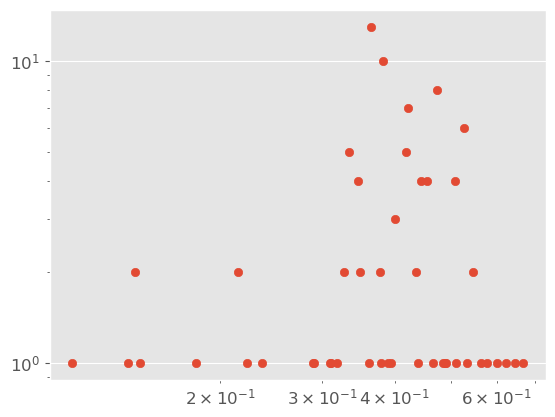

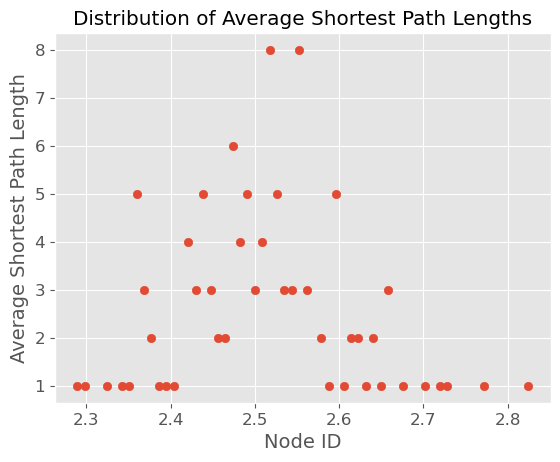

Average Statistics Time:
Degree Time: 0.56311
Connected Component Time: 0.75291
Cluster Coefficient Time: 1.08849
Shortest Path Length Time 0.4164
----------------------------------------------------------------------------------------
out.p2p-Gnutella31
Total memory usage of nodes in graph: 3004128 bytes
Total memory usage of edges in graph: 7098816 bytes


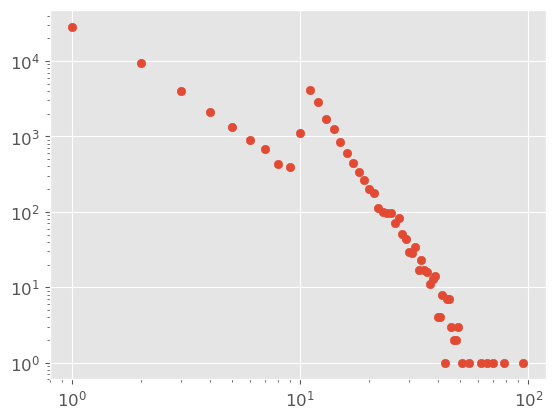

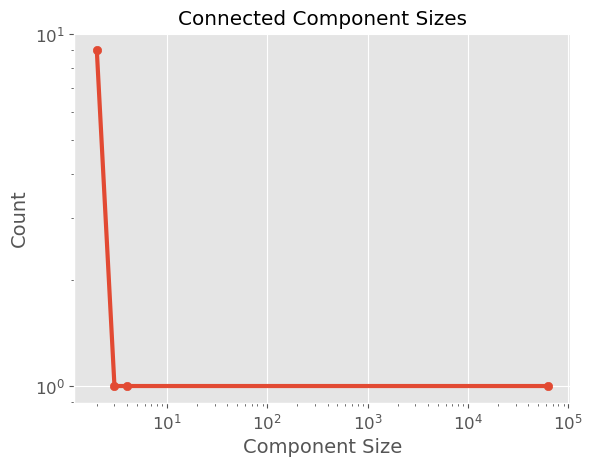

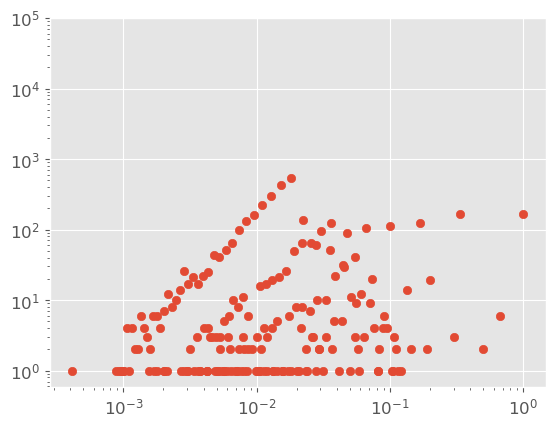

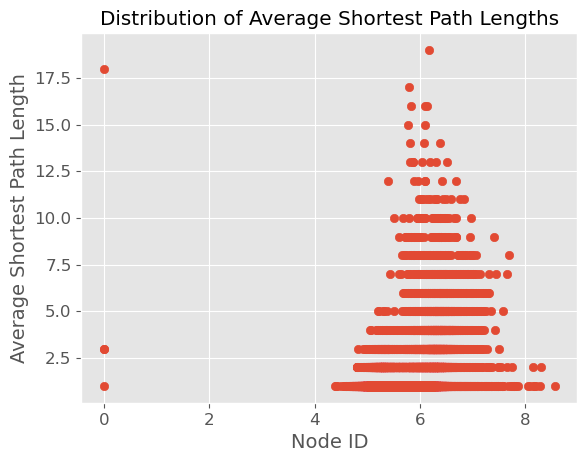

Average Statistics Time:
Degree Time: 0.99539
Connected Component Time: 0.72251
Cluster Coefficient Time: 22.99791
Shortest Path Length Time 8671.06671
----------------------------------------------------------------------------------------


In [3]:
import snap
import matplotlib.pyplot as plt

datasets=['out.opsahl-southernwomen','out.dimacs10-football','out.p2p-Gnutella31']

for dataset in datasets:
    times = []
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    print(dataset)
        
    total_node_mem_usage = sum(sys.getsizeof(NI) for NI in G.Nodes())
    print("Total memory usage of nodes in graph:", total_node_mem_usage, "bytes")
    
    # Estimate memory usage of all edges
    total_edge_mem_usage = sum(sys.getsizeof(EI) for EI in G.Edges())
    print("Total memory usage of edges in graph:", total_edge_mem_usage, "bytes")
    
    
    start = time.time()
    degrees=[node.GetDeg() for node in G.Nodes()]
    # Plot the degree distribution using matplotlib as a scatter plot
    plot_distribution (degrees, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    
    #Connected_Components_Analysis
    start = time.time()
    plot_connected_components(G)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)


    #Clustering Coeffecient Analysis
    #Create a dictionary to store clustering coefficient for each node
    start = time.time()
    clust_coeff = {}
    # Iterate through all nodes in the graph
    for node in G.Nodes():
        # Get the clustering coefficient of the node
        c = snap.GetNodeClustCf(G, node.GetId())
        # Store the clustering coefficient in the dictionary
        clust_coeff[node.GetId()] = c
        Clust_Coff=list(clust_coeff.values())
        
    plot_distribution (Clust_Coff, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)

    #Shortest Path Analysis
    # Create a snap graph
    start = time.time()
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    # Calculate the average shortest path length for each node in the graph
    avg_shortest_path = shortPathLength(G)
    # Plot the distribution of average shortest path lengths
    plot_distribution_Short(avg_shortest_path, xlabel='Node ID', ylabel='Average Shortest Path Length', title='Distribution of Average Shortest Path Lengths')
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    print('Average Statistics Time:')
    print("Degree Time:",times[0])
    print("Connected Component Time:",times[1])
    print("Cluster Coefficient Time:",times[2])
    print("Shortest Path Length Time",times[3])
    print("----------------------------------------------------------------------------------------")

#### Animal Network

out.dolphins
Total memory usage of nodes in graph: 2976 bytes
Total memory usage of edges in graph: 7632 bytes


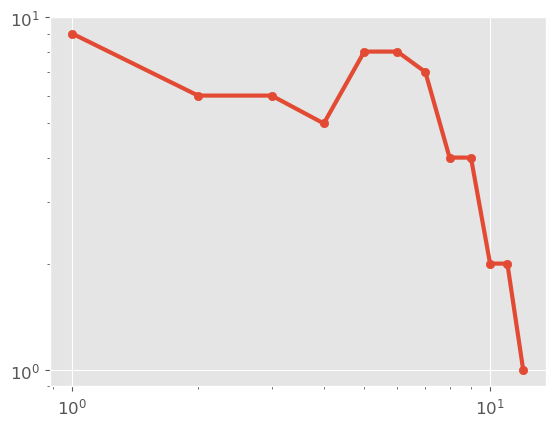

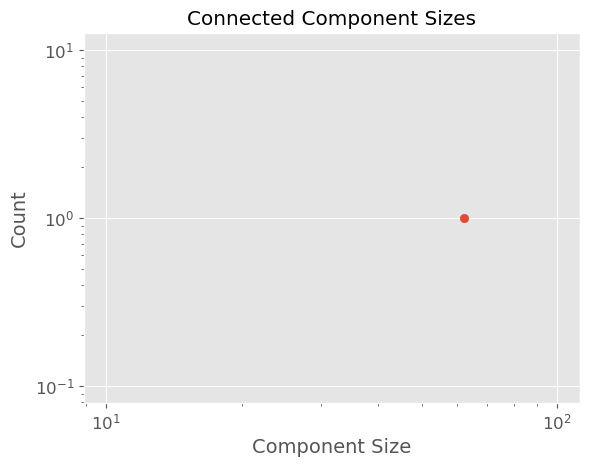

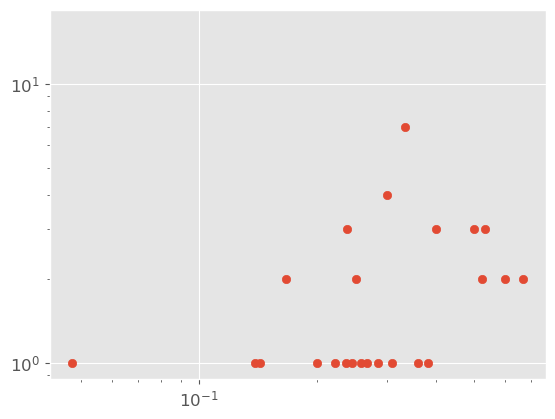

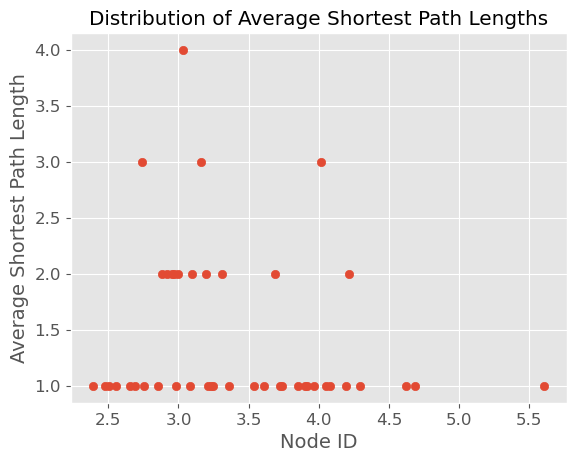

Average Statistics Time:
Degree Time: 0.30023
Connected Component Time: 0.32433
Cluster Coefficient Time: 0.29452
Shortest Path Length Time 0.23716
----------------------------------------------------------------------------------------
out.moreno_kangaroo_kangaroo
Total memory usage of nodes in graph: 816 bytes
Total memory usage of edges in graph: 4368 bytes


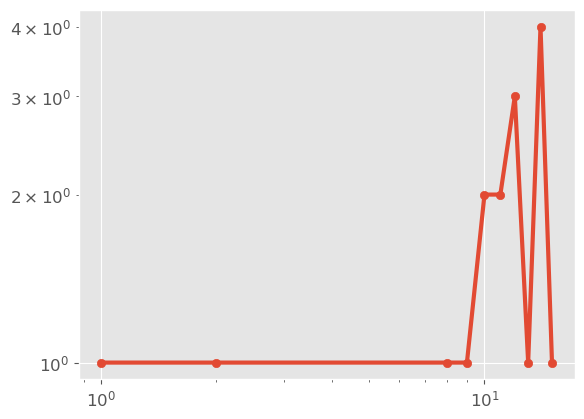

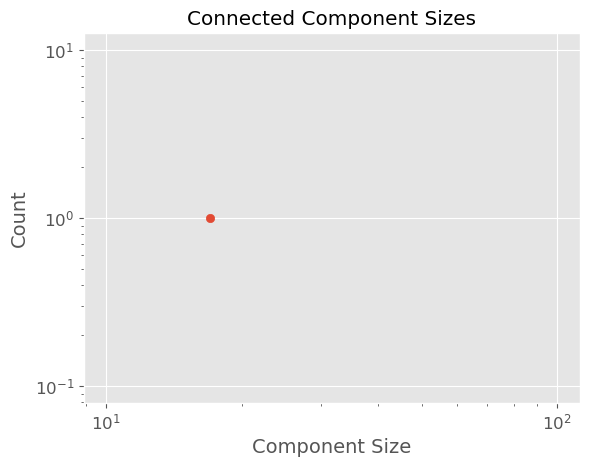

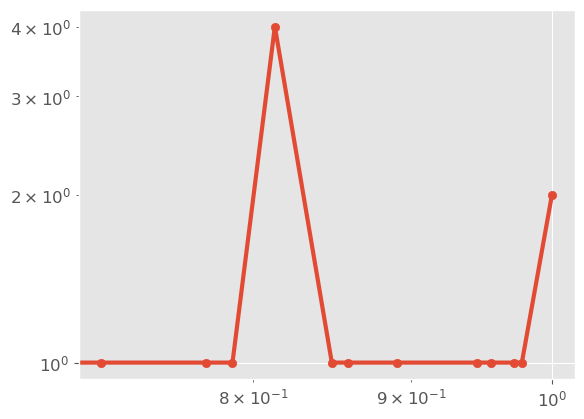

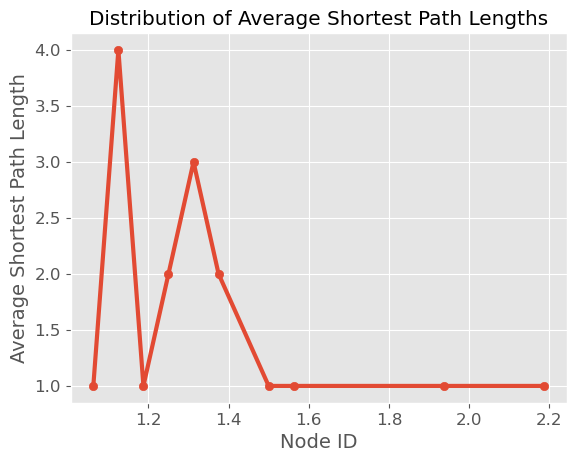

Average Statistics Time:
Degree Time: 0.28851
Connected Component Time: 0.31587
Cluster Coefficient Time: 0.31667
Shortest Path Length Time 0.11705
----------------------------------------------------------------------------------------


In [4]:
import snap
import matplotlib.pyplot as plt

datasets=['out.dolphins','out.moreno_kangaroo_kangaroo']

for dataset in datasets:
    times = []
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    print(dataset)
    
    total_node_mem_usage = sum(sys.getsizeof(NI) for NI in G.Nodes())
    print("Total memory usage of nodes in graph:", total_node_mem_usage, "bytes")
    
    # Estimate memory usage of all edges
    total_edge_mem_usage = sum(sys.getsizeof(EI) for EI in G.Edges())
    print("Total memory usage of edges in graph:", total_edge_mem_usage, "bytes")
    
    
    
    start = time.time()
    degrees=[node.GetDeg() for node in G.Nodes()]
    # Plot the degree distribution using matplotlib as a scatter plot
    plot_distribution (degrees, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    
    #Connected_Components_Analysis
    start = time.time()
    plot_connected_components(G)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)


    #Clustering Coeffecient Analysis
    #Create a dictionary to store clustering coefficient for each node
    start = time.time()
    clust_coeff = {}
    # Iterate through all nodes in the graph
    for node in G.Nodes():
        # Get the clustering coefficient of the node
        c = snap.GetNodeClustCf(G, node.GetId())
        # Store the clustering coefficient in the dictionary
        clust_coeff[node.GetId()] = c
        Clust_Coff=list(clust_coeff.values())
        
    plot_distribution (Clust_Coff, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)

    #Shortest Path Analysis
    # Create a snap graph
    start = time.time()
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    # Calculate the average shortest path length for each node in the graph
    avg_shortest_path = shortPathLength(G)
    # Plot the distribution of average shortest path lengths
    plot_distribution_Short(avg_shortest_path, xlabel='Node ID', ylabel='Average Shortest Path Length', title='Distribution of Average Shortest Path Lengths')
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    print('Average Statistics Time:')
    print("Degree Time:",times[0])
    print("Connected Component Time:",times[1])
    print("Cluster Coefficient Time:",times[2])
    print("Shortest Path Length Time",times[3])
    print("----------------------------------------------------------------------------------------")

#### Affiliation Network

out.brunson_club-membership_club-membership
Total memory usage of nodes in graph: 1200 bytes
Total memory usage of edges in graph: 4464 bytes


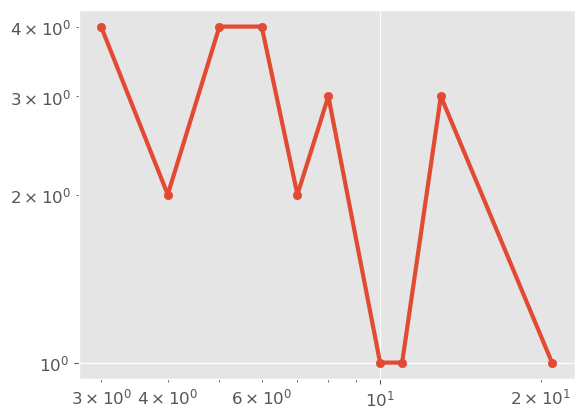

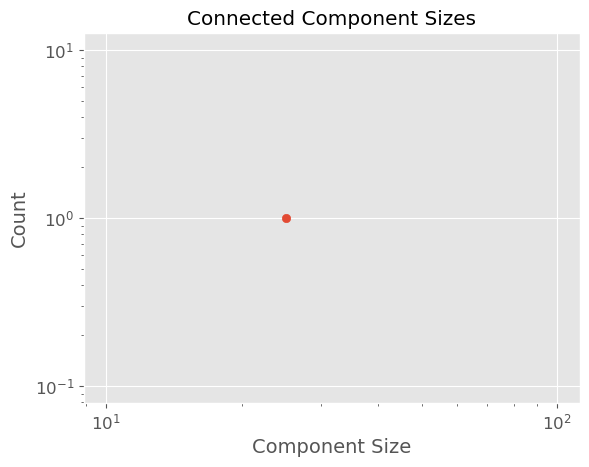

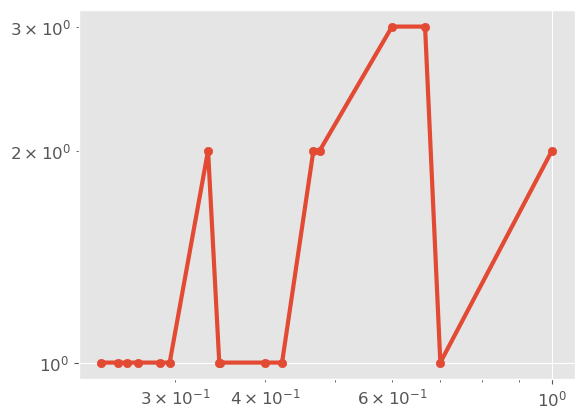

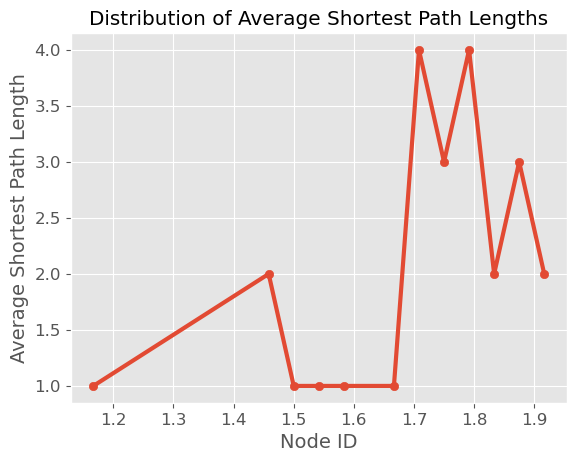

Average Statistics Time:
Degree Time: 0.30631
Connected Component Time: 0.31399
Cluster Coefficient Time: 0.28944
Shortest Path Length Time 0.13748
----------------------------------------------------------------------------------------


In [5]:
import snap
import matplotlib.pyplot as plt

datasets=['out.brunson_club-membership_club-membership']

for dataset in datasets:
    times = []
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    print(dataset)
    
    total_node_mem_usage = sum(sys.getsizeof(NI) for NI in G.Nodes())
    print("Total memory usage of nodes in graph:", total_node_mem_usage, "bytes")
    
    # Estimate memory usage of all edges
    total_edge_mem_usage = sum(sys.getsizeof(EI) for EI in G.Edges())
    print("Total memory usage of edges in graph:", total_edge_mem_usage, "bytes")
    
    
    start = time.time()
    degrees=[node.GetDeg() for node in G.Nodes()]
    # Plot the degree distribution using matplotlib as a scatter plot
    plot_distribution (degrees, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    
    #Connected_Components_Analysis
    start = time.time()
    plot_connected_components(G)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)


    #Clustering Coeffecient Analysis
    #Create a dictionary to store clustering coefficient for each node
    start = time.time()
    clust_coeff = {}
    # Iterate through all nodes in the graph
    for node in G.Nodes():
        # Get the clustering coefficient of the node
        c = snap.GetNodeClustCf(G, node.GetId())
        # Store the clustering coefficient in the dictionary
        clust_coeff[node.GetId()] = c
        Clust_Coff=list(clust_coeff.values())
        
    plot_distribution (Clust_Coff, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)

    #Shortest Path Analysis
    # Create a snap graph
    start = time.time()
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    # Calculate the average shortest path length for each node in the graph
    avg_shortest_path = shortPathLength(G)
    # Plot the distribution of average shortest path lengths
    plot_distribution_Short(avg_shortest_path, xlabel='Node ID', ylabel='Average Shortest Path Length', title='Distribution of Average Shortest Path Lengths')
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    print('Average Statistics Time:')
    print("Degree Time:",times[0])
    print("Connected Component Time:",times[1])
    print("Cluster Coefficient Time:",times[2])
    print("Shortest Path Length Time",times[3])
    print("----------------------------------------------------------------------------------------")

#### Authorship network

out.edit-chwiktionary
Total memory usage of nodes in graph: 3216 bytes
Total memory usage of edges in graph: 3984 bytes


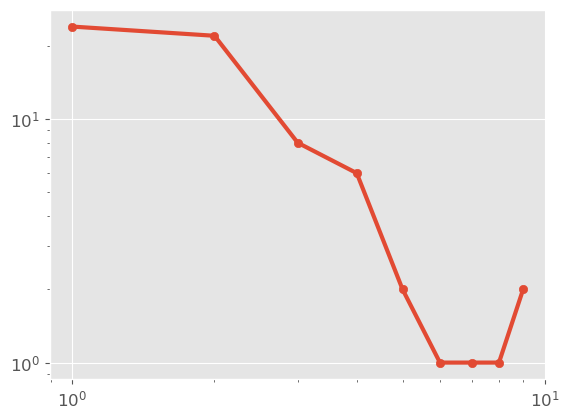

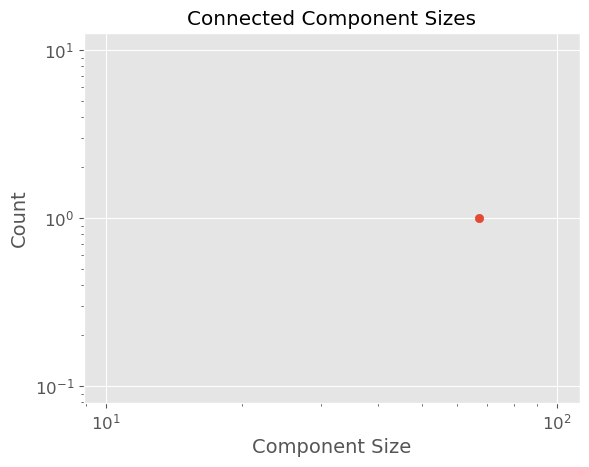

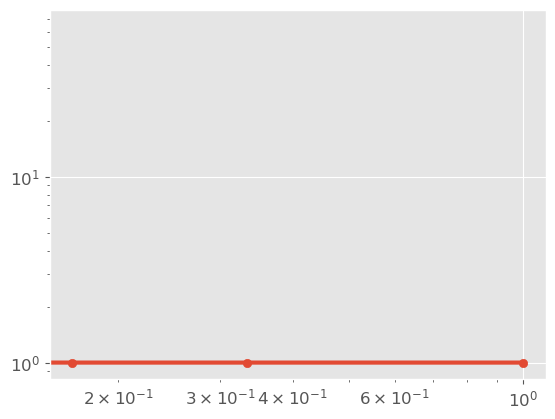

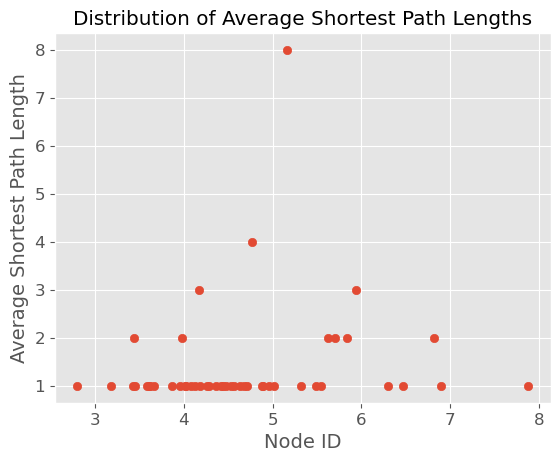

Average Statistics Time:
Degree Time: 0.31514
Connected Component Time: 0.31729
Cluster Coefficient Time: 0.31876
Shortest Path Length Time 0.12512
----------------------------------------------------------------------------------------


In [6]:
import snap
import matplotlib.pyplot as plt

datasets= ['out.edit-chwiktionary']

for dataset in datasets:
    times = []
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    print(dataset)
    
    total_node_mem_usage = sum(sys.getsizeof(NI) for NI in G.Nodes())
    print("Total memory usage of nodes in graph:", total_node_mem_usage, "bytes")
    
    # Estimate memory usage of all edges
    total_edge_mem_usage = sum(sys.getsizeof(EI) for EI in G.Edges())
    print("Total memory usage of edges in graph:", total_edge_mem_usage, "bytes")
    
    

    
    start = time.time()
    degrees=[node.GetDeg() for node in G.Nodes()]
    # Plot the degree distribution using matplotlib as a scatter plot
    plot_distribution (degrees, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    
    #Connected_Components_Analysis
    start = time.time()
    plot_connected_components(G)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)


    #Clustering Coeffecient Analysis
    #Create a dictionary to store clustering coefficient for each node
    start = time.time()
    clust_coeff = {}
    # Iterate through all nodes in the graph
    for node in G.Nodes():
        # Get the clustering coefficient of the node
        c = snap.GetNodeClustCf(G, node.GetId())
        # Store the clustering coefficient in the dictionary
        clust_coeff[node.GetId()] = c
        Clust_Coff=list(clust_coeff.values())
        
    plot_distribution (Clust_Coff, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)

    #Shortest Path Analysis
    # Create a snap graph
    start = time.time()
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    # Calculate the average shortest path length for each node in the graph
    avg_shortest_path = shortPathLength(G)
    # Plot the distribution of average shortest path lengths
    plot_distribution_Short(avg_shortest_path, xlabel='Node ID', ylabel='Average Shortest Path Length', title='Distribution of Average Shortest Path Lengths')
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    print('Average Statistics Time:')
    print("Degree Time:",times[0])
    print("Connected Component Time:",times[1])
    print("Cluster Coefficient Time:",times[2])
    print("Shortest Path Length Time",times[3])
    print("----------------------------------------------------------------------------------------")

#### Human Contact Networks

out.moreno_beach_beach
Total memory usage of nodes in graph: 2064 bytes
Total memory usage of edges in graph: 16128 bytes


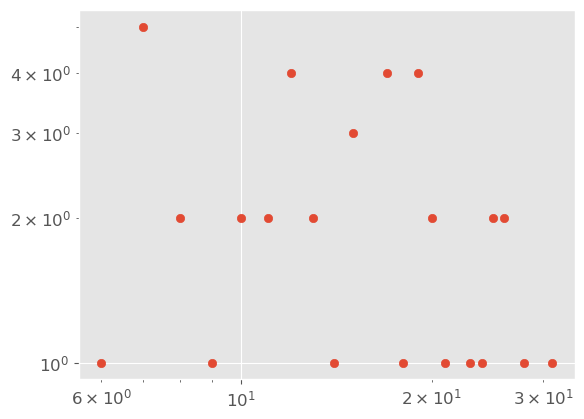

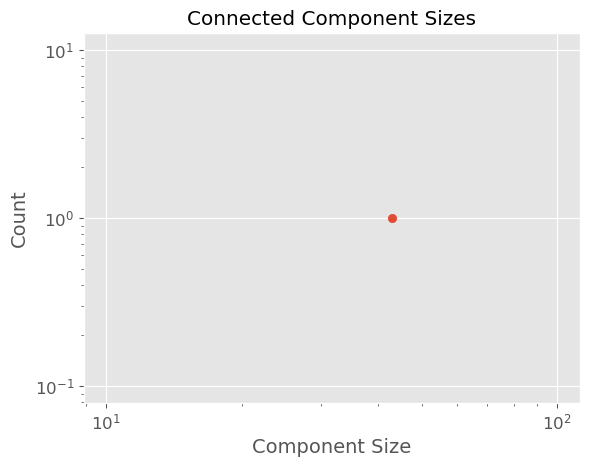

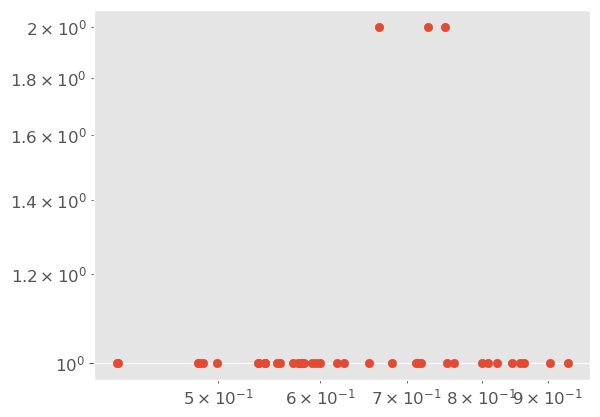

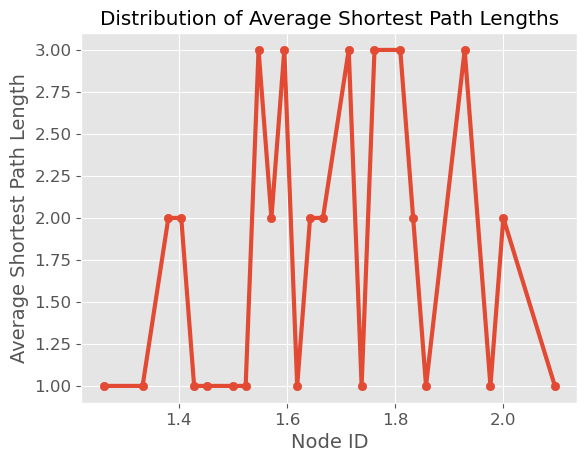

Average Statistics Time:
Degree Time: 0.37703
Connected Component Time: 0.31029
Cluster Coefficient Time: 0.30228
Shortest Path Length Time 0.11895
----------------------------------------------------------------------------------------
out.hiv
Total memory usage of nodes in graph: 1920 bytes
Total memory usage of edges in graph: 1968 bytes


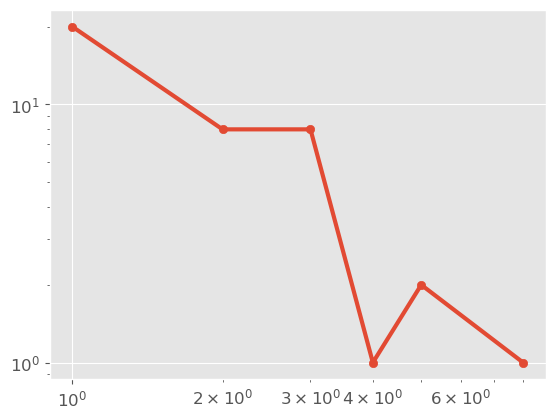

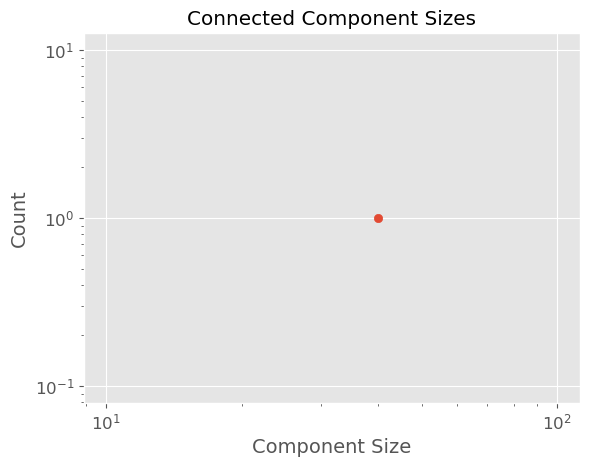

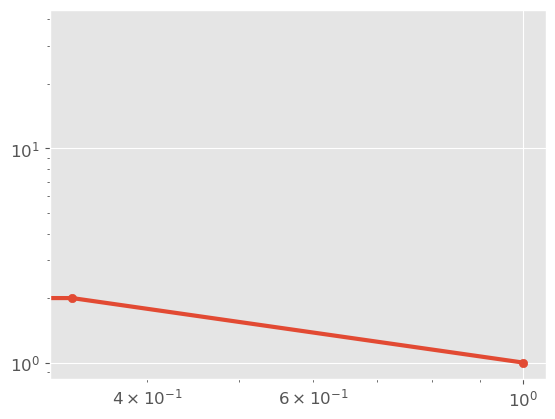

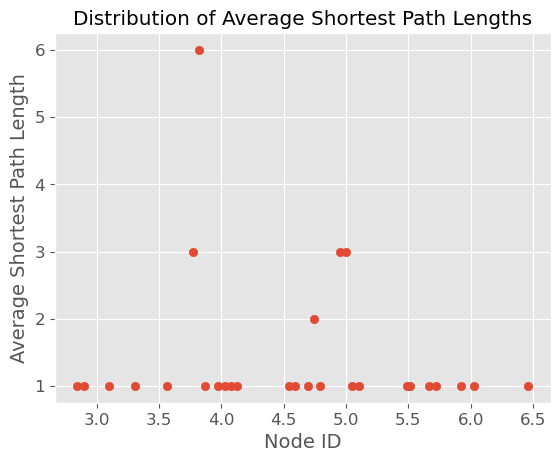

Average Statistics Time:
Degree Time: 0.38095
Connected Component Time: 0.30479
Cluster Coefficient Time: 0.29744
Shortest Path Length Time 0.11421
----------------------------------------------------------------------------------------


In [7]:
import snap
import matplotlib.pyplot as plt

datasets= ['out.moreno_beach_beach','out.hiv']

for dataset in datasets:
    times = []
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    print(dataset)
    
    total_node_mem_usage = sum(sys.getsizeof(NI) for NI in G.Nodes())
    print("Total memory usage of nodes in graph:", total_node_mem_usage, "bytes")
    
    # Estimate memory usage of all edges
    total_edge_mem_usage = sum(sys.getsizeof(EI) for EI in G.Edges())
    print("Total memory usage of edges in graph:", total_edge_mem_usage, "bytes")
    
    
    start = time.time()
    degrees=[node.GetDeg() for node in G.Nodes()]
    # Plot the degree distribution using matplotlib as a scatter plot
    plot_distribution (degrees, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    
    #Connected_Components_Analysis
    start = time.time()
    plot_connected_components(G)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)


    #Clustering Coeffecient Analysis
    #Create a dictionary to store clustering coefficient for each node
    start = time.time()
    clust_coeff = {}
    # Iterate through all nodes in the graph
    for node in G.Nodes():
        # Get the clustering coefficient of the node
        c = snap.GetNodeClustCf(G, node.GetId())
        # Store the clustering coefficient in the dictionary
        clust_coeff[node.GetId()] = c
        Clust_Coff=list(clust_coeff.values())
        
    plot_distribution (Clust_Coff, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)

    #Shortest Path Analysis
    # Create a snap graph
    start = time.time()
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    # Calculate the average shortest path length for each node in the graph
    avg_shortest_path = shortPathLength(G)
    # Plot the distribution of average shortest path lengths
    plot_distribution_Short(avg_shortest_path, xlabel='Node ID', ylabel='Average Shortest Path Length', title='Distribution of Average Shortest Path Lengths')
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    print('Average Statistics Time:')
    print("Degree Time:",times[0])
    print("Connected Component Time:",times[1])
    print("Cluster Coefficient Time:",times[2])
    print("Shortest Path Length Time",times[3])
    print("----------------------------------------------------------------------------------------")

#### Human Social Network

out.moreno_taro_taro
Total memory usage of nodes in graph: 1056 bytes
Total memory usage of edges in graph: 1872 bytes


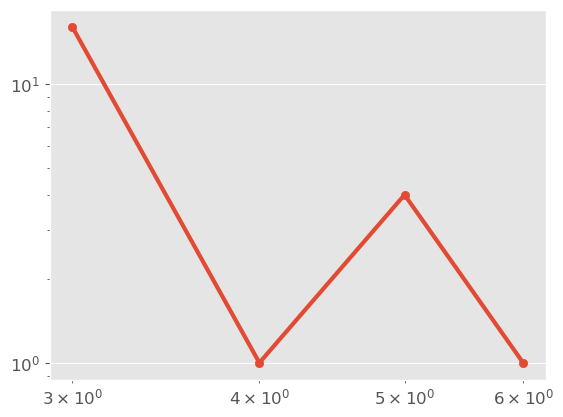

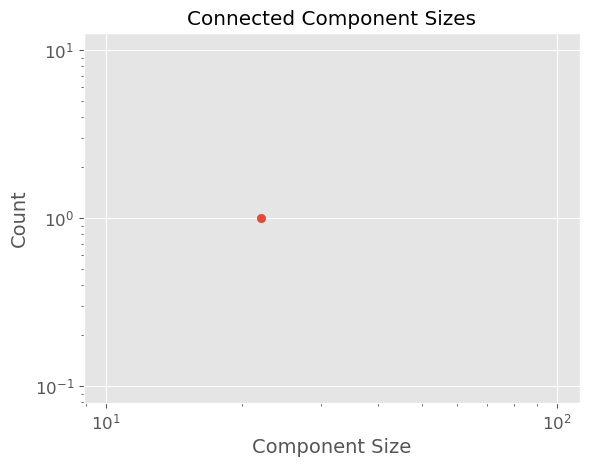

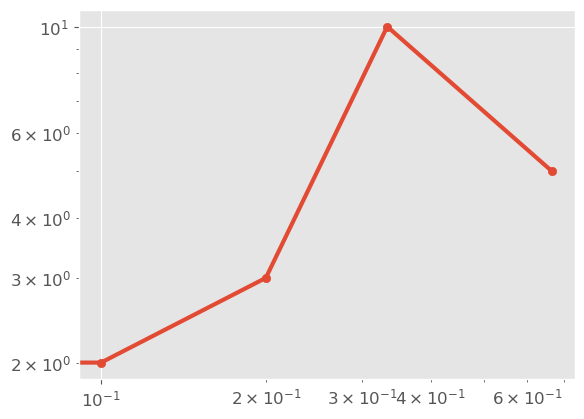

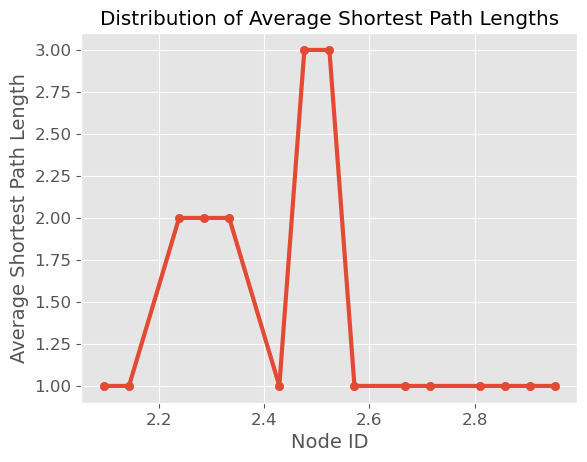

Average Statistics Time:
Degree Time: 0.2921
Connected Component Time: 0.3736
Cluster Coefficient Time: 0.34795
Shortest Path Length Time 0.12971
----------------------------------------------------------------------------------------


In [8]:
import snap
import matplotlib.pyplot as plt

datasets= ['out.moreno_taro_taro']

for dataset in datasets:
    times = []
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    print(dataset)
    
    total_node_mem_usage = sum(sys.getsizeof(NI) for NI in G.Nodes())
    print("Total memory usage of nodes in graph:", total_node_mem_usage, "bytes")
    
    # Estimate memory usage of all edges
    total_edge_mem_usage = sum(sys.getsizeof(EI) for EI in G.Edges())
    print("Total memory usage of edges in graph:", total_edge_mem_usage, "bytes")
    
    
    start = time.time()
    degrees=[node.GetDeg() for node in G.Nodes()]
    # Plot the degree distribution using matplotlib as a scatter plot
    plot_distribution (degrees, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    
    #Connected_Components_Analysis
    start = time.time()
    plot_connected_components(G)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)


    #Clustering Coeffecient Analysis
    #Create a dictionary to store clustering coefficient for each node
    start = time.time()
    clust_coeff = {}
    # Iterate through all nodes in the graph
    for node in G.Nodes():
        # Get the clustering coefficient of the node
        c = snap.GetNodeClustCf(G, node.GetId())
        # Store the clustering coefficient in the dictionary
        clust_coeff[node.GetId()] = c
        Clust_Coff=list(clust_coeff.values())
        
    plot_distribution (Clust_Coff, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)

    #Shortest Path Analysis
    # Create a snap graph
    start = time.time()
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    # Calculate the average shortest path length for each node in the graph
    avg_shortest_path = shortPathLength(G)
    # Plot the distribution of average shortest path lengths
    plot_distribution_Short(avg_shortest_path, xlabel='Node ID', ylabel='Average Shortest Path Length', title='Distribution of Average Shortest Path Lengths')
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    print('Average Statistics Time:')
    print("Degree Time:",times[0])
    print("Connected Component Time:",times[1])
    print("Cluster Coefficient Time:",times[2])
    print("Shortest Path Length Time",times[3])
    print("----------------------------------------------------------------------------------------")

#### Hyperlink Network

out.cfinder-google
Total memory usage of nodes in graph: 756624 bytes
Total memory usage of edges in graph: 7173888 bytes


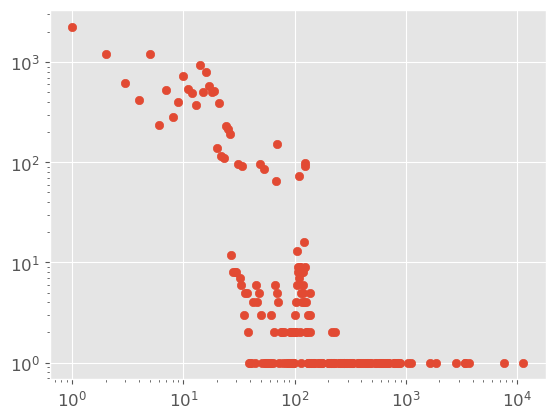

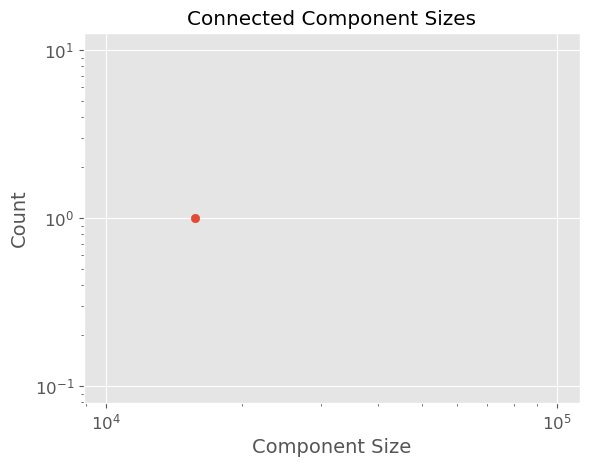

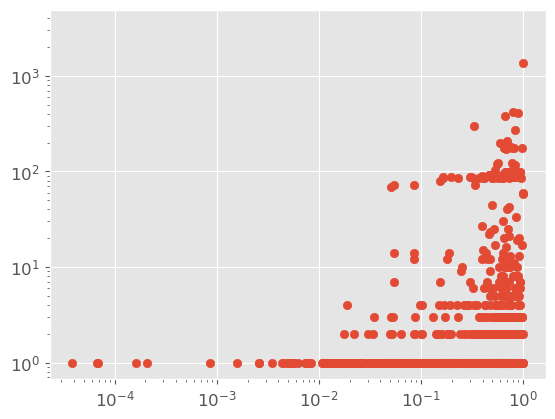

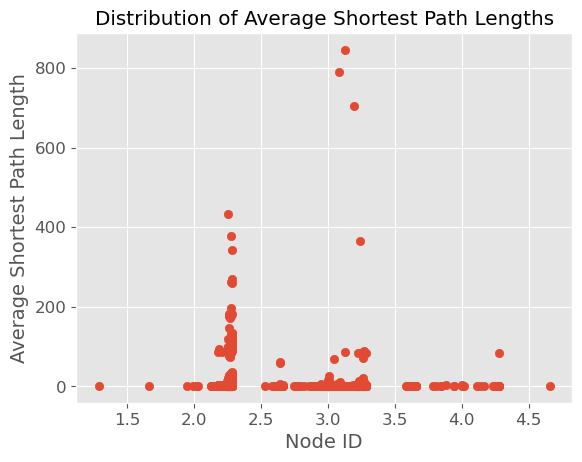

Average Statistics Time:
Degree Time: 0.45087
Connected Component Time: 0.41778
Cluster Coefficient Time: 3.03046
Shortest Path Length Time 614.49477
----------------------------------------------------------------------------------------


In [9]:
import snap
import matplotlib.pyplot as plt

datasets= ['out.cfinder-google']

for dataset in datasets:
    times = []
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    print(dataset)
    
    total_node_mem_usage = sum(sys.getsizeof(NI) for NI in G.Nodes())
    print("Total memory usage of nodes in graph:", total_node_mem_usage, "bytes")
    
    # Estimate memory usage of all edges
    total_edge_mem_usage = sum(sys.getsizeof(EI) for EI in G.Edges())
    print("Total memory usage of edges in graph:", total_edge_mem_usage, "bytes")
    
    
    
    start = time.time()
    degrees=[node.GetDeg() for node in G.Nodes()]
    # Plot the degree distribution using matplotlib as a scatter plot
    plot_distribution (degrees, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    
    #Connected_Components_Analysis
    start = time.time()
    plot_connected_components(G)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)


    #Clustering Coeffecient Analysis
    #Create a dictionary to store clustering coefficient for each node
    start = time.time()
    clust_coeff = {}
    # Iterate through all nodes in the graph
    for node in G.Nodes():
        # Get the clustering coefficient of the node
        c = snap.GetNodeClustCf(G, node.GetId())
        # Store the clustering coefficient in the dictionary
        clust_coeff[node.GetId()] = c
        Clust_Coff=list(clust_coeff.values())
        
    plot_distribution (Clust_Coff, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)

    #Shortest Path Analysis
    # Create a snap graph
    start = time.time()
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    # Calculate the average shortest path length for each node in the graph
    avg_shortest_path = shortPathLength(G)
    # Plot the distribution of average shortest path lengths
    plot_distribution_Short(avg_shortest_path, xlabel='Node ID', ylabel='Average Shortest Path Length', title='Distribution of Average Shortest Path Lengths')
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    print('Average Statistics Time:')
    print("Degree Time:",times[0])
    print("Connected Component Time:",times[1])
    print("Cluster Coefficient Time:",times[2])
    print("Shortest Path Length Time",times[3])
    print("----------------------------------------------------------------------------------------")

#### Infrastructure network

out.tntp-ChicagoRegional
Total memory usage of nodes in graph: 622992 bytes
Total memory usage of edges in graph: 990096 bytes


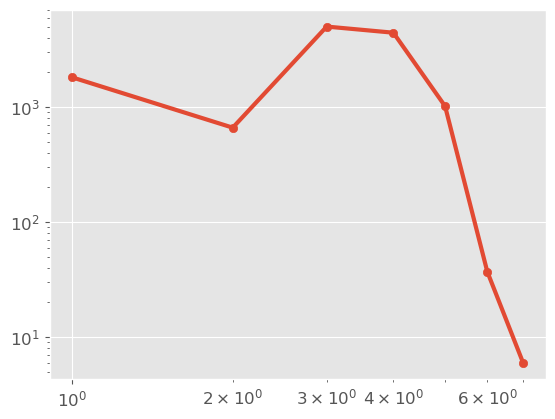

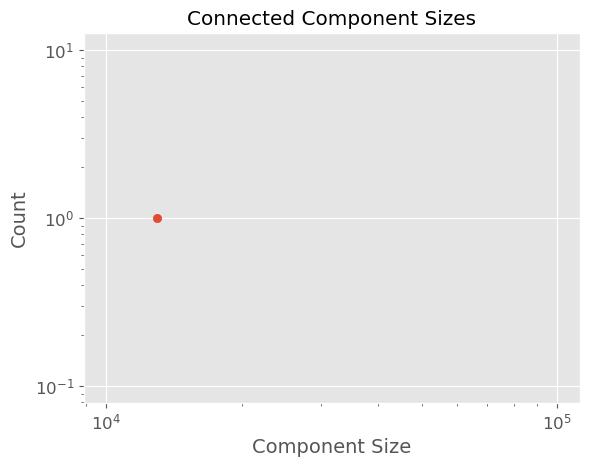

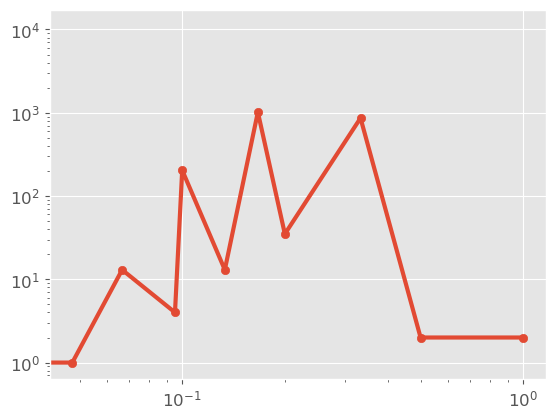

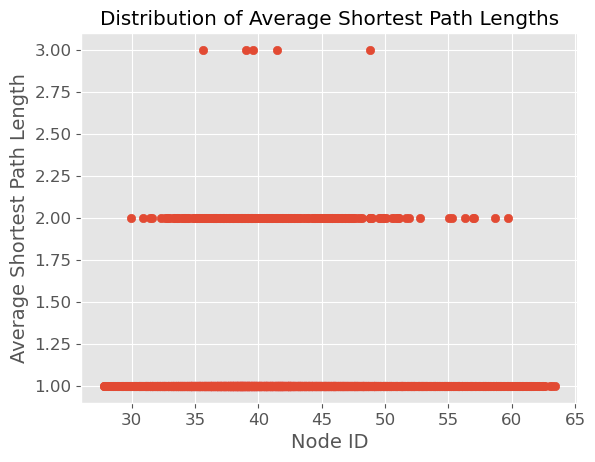

Average Statistics Time:
Degree Time: 0.64617
Connected Component Time: 0.45994
Cluster Coefficient Time: 1.26433
Shortest Path Length Time 351.10744
----------------------------------------------------------------------------------------
out.subelj_euroroad_euroroad
Total memory usage of nodes in graph: 56352 bytes
Total memory usage of edges in graph: 68016 bytes


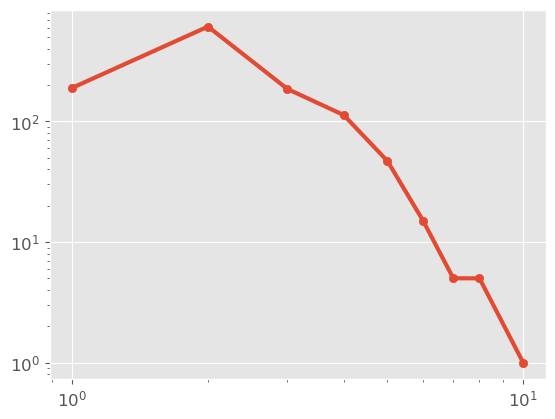

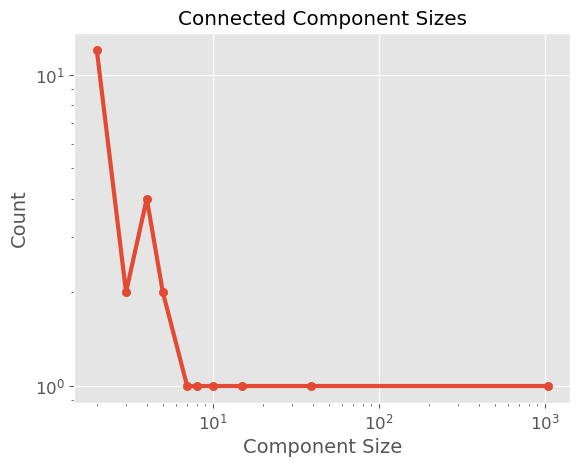

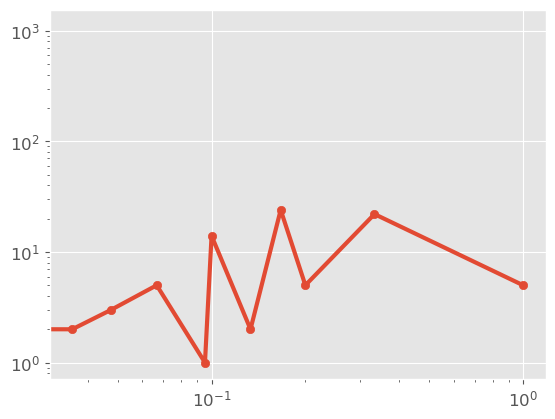

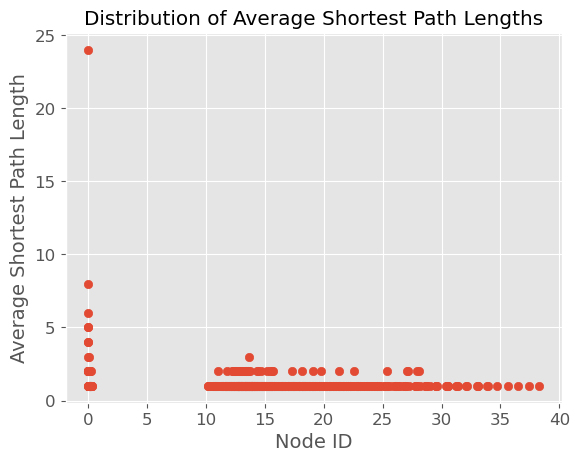

Average Statistics Time:
Degree Time: 0.40968
Connected Component Time: 0.34775
Cluster Coefficient Time: 0.36174
Shortest Path Length Time 2.23365
----------------------------------------------------------------------------------------


In [10]:
import snap
import matplotlib.pyplot as plt

datasets= ['out.tntp-ChicagoRegional','out.subelj_euroroad_euroroad']

for dataset in datasets:
    times = []
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    print(dataset)
    
    total_node_mem_usage = sum(sys.getsizeof(NI) for NI in G.Nodes())
    print("Total memory usage of nodes in graph:", total_node_mem_usage, "bytes")
    
    # Estimate memory usage of all edges
    total_edge_mem_usage = sum(sys.getsizeof(EI) for EI in G.Edges())
    print("Total memory usage of edges in graph:", total_edge_mem_usage, "bytes")
    
    
    start = time.time()
    degrees=[node.GetDeg() for node in G.Nodes()]
    # Plot the degree distribution using matplotlib as a scatter plot
    plot_distribution (degrees, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    
    #Connected_Components_Analysis
    start = time.time()
    plot_connected_components(G)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)


    #Clustering Coeffecient Analysis
    #Create a dictionary to store clustering coefficient for each node
    start = time.time()
    clust_coeff = {}
    # Iterate through all nodes in the graph
    for node in G.Nodes():
        # Get the clustering coefficient of the node
        c = snap.GetNodeClustCf(G, node.GetId())
        # Store the clustering coefficient in the dictionary
        clust_coeff[node.GetId()] = c
        Clust_Coff=list(clust_coeff.values())
        
    plot_distribution (Clust_Coff, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)

    #Shortest Path Analysis
    # Create a snap graph
    start = time.time()
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    # Calculate the average shortest path length for each node in the graph
    avg_shortest_path = shortPathLength(G)
    # Plot the distribution of average shortest path lengths
    plot_distribution_Short(avg_shortest_path, xlabel='Node ID', ylabel='Average Shortest Path Length', title='Distribution of Average Shortest Path Lengths')
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    print('Average Statistics Time:')
    print("Degree Time:",times[0])
    print("Connected Component Time:",times[1])
    print("Cluster Coefficient Time:",times[2])
    print("Shortest Path Length Time",times[3])
    print("----------------------------------------------------------------------------------------")

#### Metabolic Network

out.maayan-vidal
Total memory usage of nodes in graph: 150384 bytes
Total memory usage of edges in graph: 322848 bytes


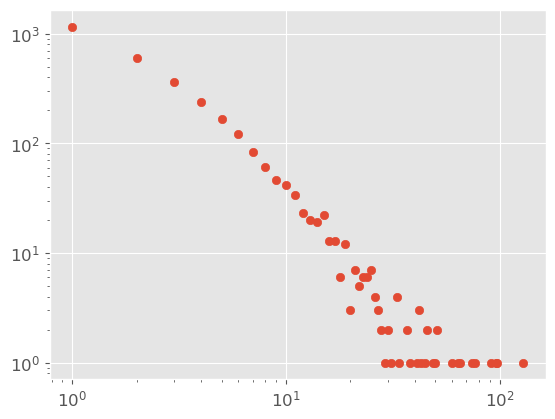

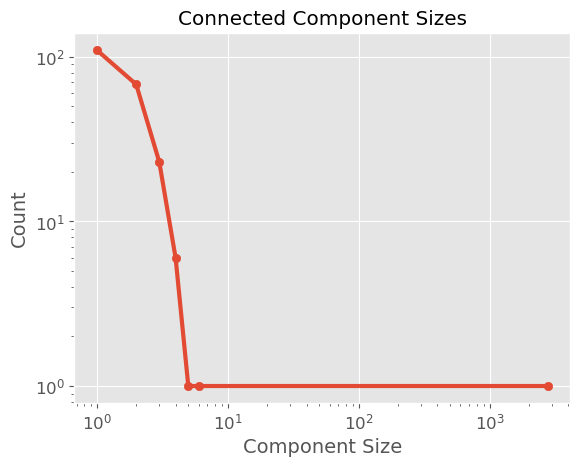

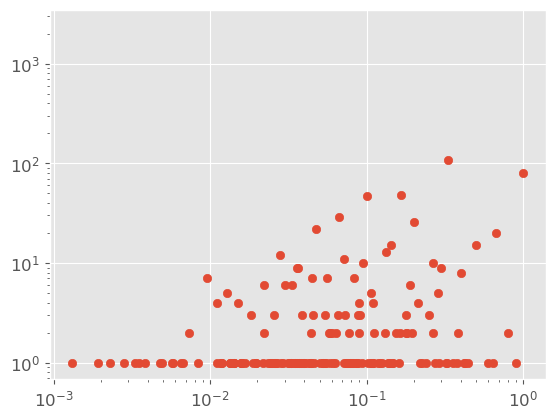

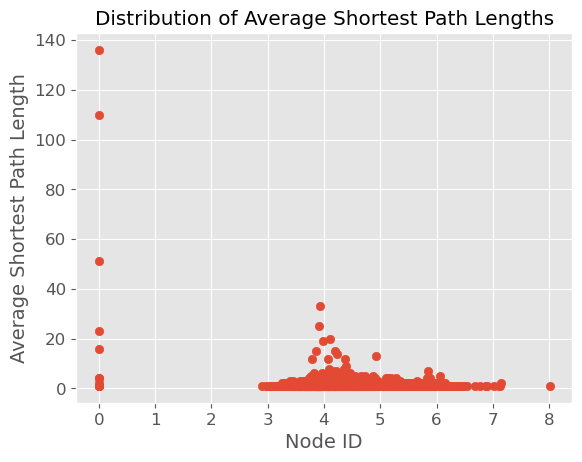

Average Statistics Time:
Degree Time: 0.45005
Connected Component Time: 0.38383
Cluster Coefficient Time: 0.49243
Shortest Path Length Time 15.16031
----------------------------------------------------------------------------------------
out.moreno_propro_propro
Total memory usage of nodes in graph: 89760 bytes
Total memory usage of edges in graph: 109296 bytes


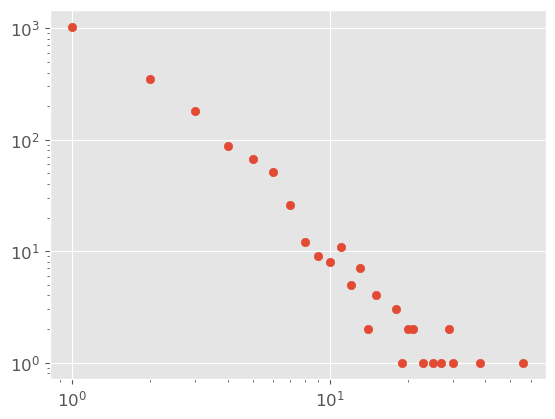

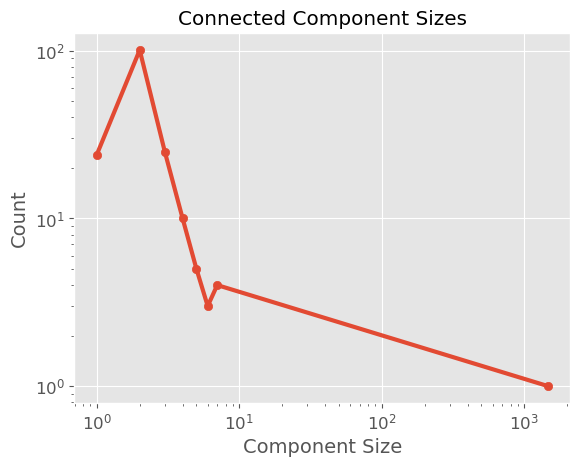

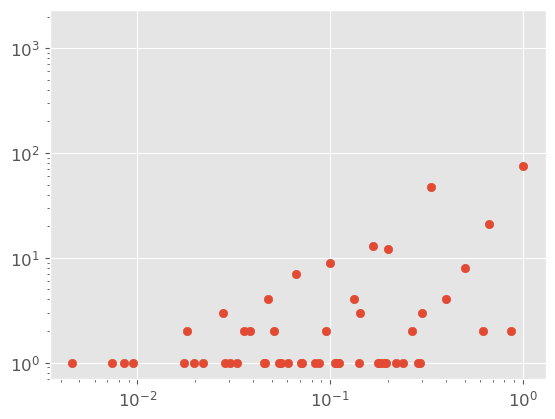

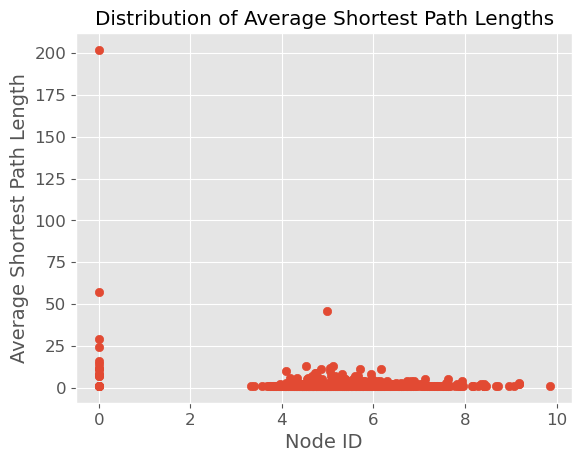

Average Statistics Time:
Degree Time: 0.43989
Connected Component Time: 0.38664
Cluster Coefficient Time: 0.40226
Shortest Path Length Time 4.25376
----------------------------------------------------------------------------------------


In [11]:
import snap
import matplotlib.pyplot as plt

datasets=['out.maayan-vidal','out.moreno_propro_propro']

for dataset in datasets:
    times = []
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    print(dataset)
    
    total_node_mem_usage = sum(sys.getsizeof(NI) for NI in G.Nodes())
    print("Total memory usage of nodes in graph:", total_node_mem_usage, "bytes")
    
    # Estimate memory usage of all edges
    total_edge_mem_usage = sum(sys.getsizeof(EI) for EI in G.Edges())
    print("Total memory usage of edges in graph:", total_edge_mem_usage, "bytes")
    
    

    start = time.time()
    degrees=[node.GetDeg() for node in G.Nodes()]
    # Plot the degree distribution using matplotlib as a scatter plot
    plot_distribution (degrees, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    
    #Connected_Components_Analysis
    start = time.time()
    plot_connected_components(G)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)


    #Clustering Coeffecient Analysis
    #Create a dictionary to store clustering coefficient for each node
    start = time.time()
    clust_coeff = {}
    # Iterate through all nodes in the graph
    for node in G.Nodes():
        # Get the clustering coefficient of the node
        c = snap.GetNodeClustCf(G, node.GetId())
        # Store the clustering coefficient in the dictionary
        clust_coeff[node.GetId()] = c
        Clust_Coff=list(clust_coeff.values())
        
    plot_distribution (Clust_Coff, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)

    #Shortest Path Analysis
    # Create a snap graph
    start = time.time()
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    # Calculate the average shortest path length for each node in the graph
    avg_shortest_path = shortPathLength(G)
    # Plot the distribution of average shortest path lengths
    plot_distribution_Short(avg_shortest_path, xlabel='Node ID', ylabel='Average Shortest Path Length', title='Distribution of Average Shortest Path Lengths')
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    print('Average Statistics Time:')
    print("Degree Time:",times[0])
    print("Connected Component Time:",times[1])
    print("Cluster Coefficient Time:",times[2])
    print("Shortest Path Length Time",times[3])
    print("----------------------------------------------------------------------------------------")

#### Miscellaneous Network

out.dbpedia-similar
Total memory usage of nodes in graph: 20640 bytes
Total memory usage of edges in graph: 27120 bytes


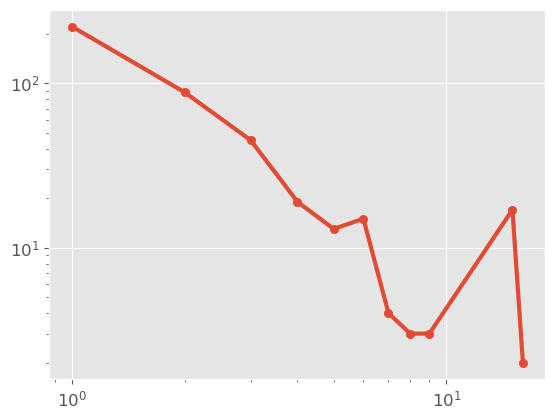

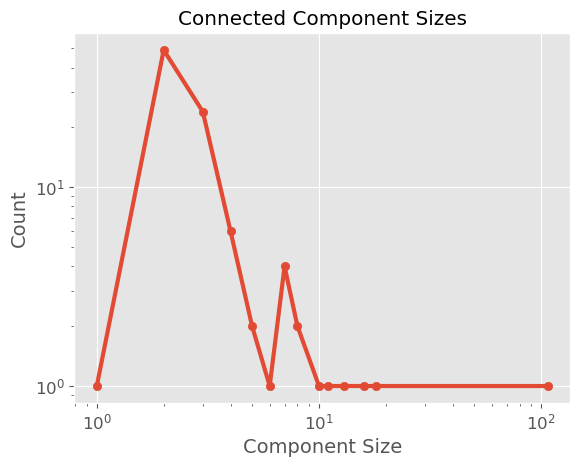

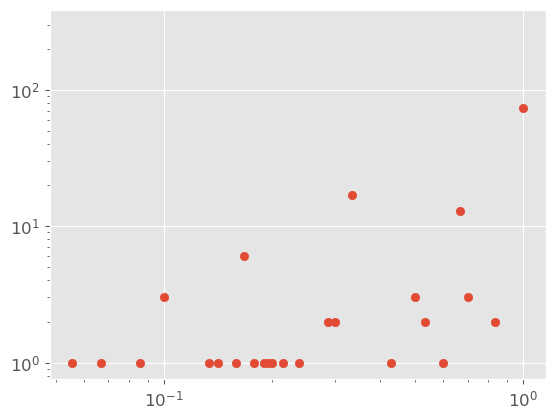

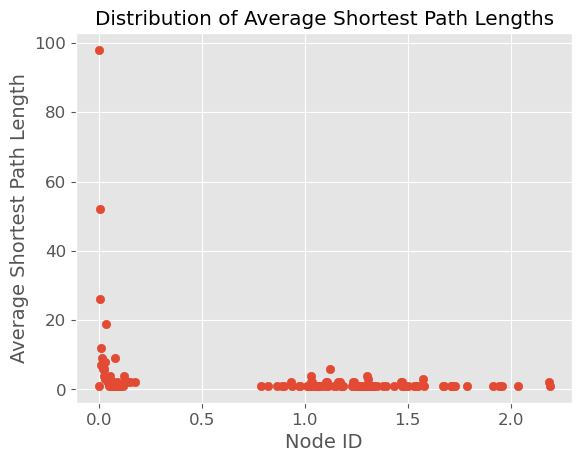

Average Statistics Time:
Degree Time: 0.30915
Connected Component Time: 0.31902
Cluster Coefficient Time: 0.32208
Shortest Path Length Time 0.15445
----------------------------------------------------------------------------------------
out.gene_fusion
Total memory usage of nodes in graph: 13968 bytes
Total memory usage of edges in graph: 13392 bytes


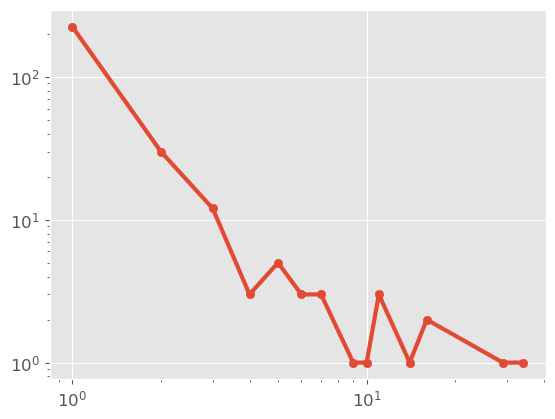

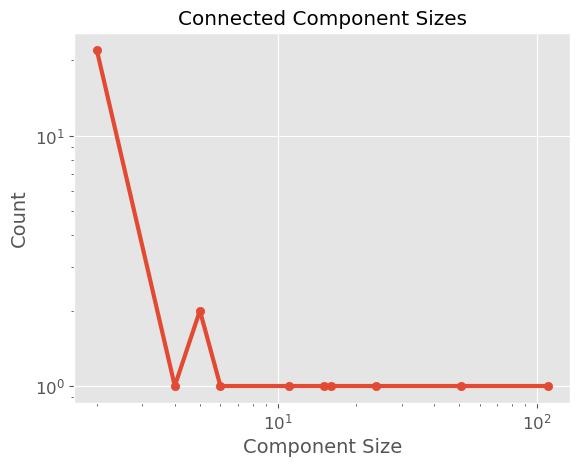

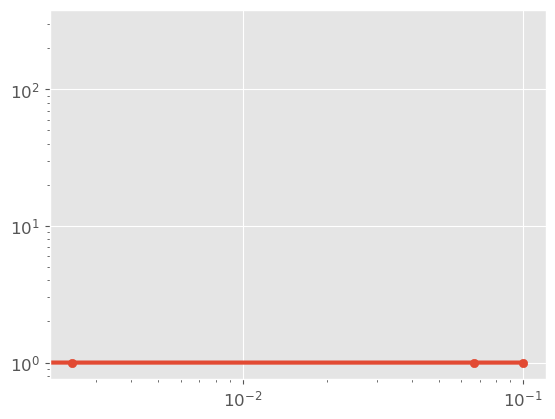

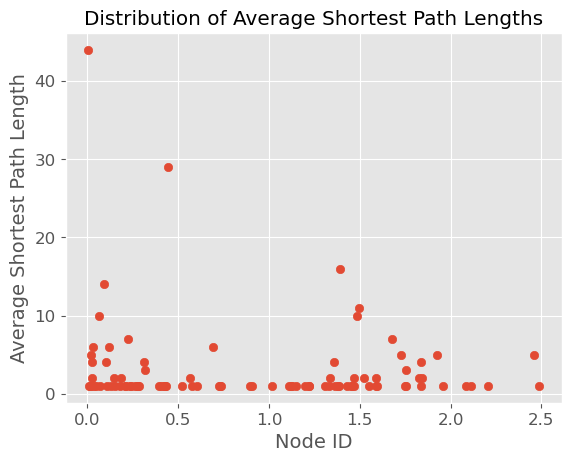

Average Statistics Time:
Degree Time: 0.50065
Connected Component Time: 0.3803
Cluster Coefficient Time: 0.40062
Shortest Path Length Time 0.19287
----------------------------------------------------------------------------------------


In [14]:
import snap
import matplotlib.pyplot as plt

datasets=['out.dbpedia-similar','out.gene_fusion']

for dataset in datasets:
    times = []
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    print(dataset)
    
    total_node_mem_usage = sum(sys.getsizeof(NI) for NI in G.Nodes())
    print("Total memory usage of nodes in graph:", total_node_mem_usage, "bytes")
    
    # Estimate memory usage of all edges
    total_edge_mem_usage = sum(sys.getsizeof(EI) for EI in G.Edges())
    print("Total memory usage of edges in graph:", total_edge_mem_usage, "bytes")
    
    
    start = time.time()
    degrees=[node.GetDeg() for node in G.Nodes()]
    # Plot the degree distribution using matplotlib as a scatter plot
    plot_distribution (degrees, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    
    #Connected_Components_Analysis
    start = time.time()
    plot_connected_components(G)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)


    #Clustering Coeffecient Analysis
    #Create a dictionary to store clustering coefficient for each node
    start = time.time()
    clust_coeff = {}
    # Iterate through all nodes in the graph
    for node in G.Nodes():
        # Get the clustering coefficient of the node
        c = snap.GetNodeClustCf(G, node.GetId())
        # Store the clustering coefficient in the dictionary
        clust_coeff[node.GetId()] = c
        Clust_Coff=list(clust_coeff.values())
        
    plot_distribution (Clust_Coff, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)

    #Shortest Path Analysis
    # Create a snap graph
    start = time.time()
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    # Calculate the average shortest path length for each node in the graph
    avg_shortest_path = shortPathLength(G)
    # Plot the distribution of average shortest path lengths
    plot_distribution_Short(avg_shortest_path, xlabel='Node ID', ylabel='Average Shortest Path Length', title='Distribution of Average Shortest Path Lengths')
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    print('Average Statistics Time:')
    print("Degree Time:",times[0])
    print("Connected Component Time:",times[1])
    print("Cluster Coefficient Time:",times[2])
    print("Shortest Path Length Time",times[3])
    print("----------------------------------------------------------------------------------------")

#### Online Social Network

out.librec-filmtrust-trust
Total memory usage of nodes in graph: 41952 bytes
Total memory usage of edges in graph: 62832 bytes


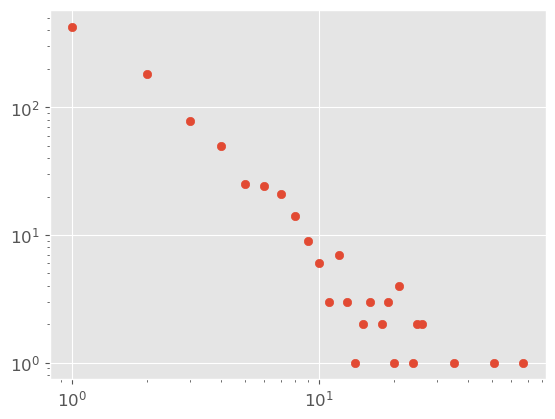

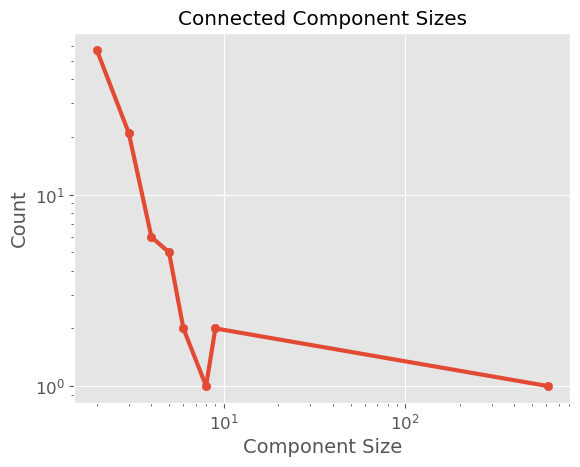

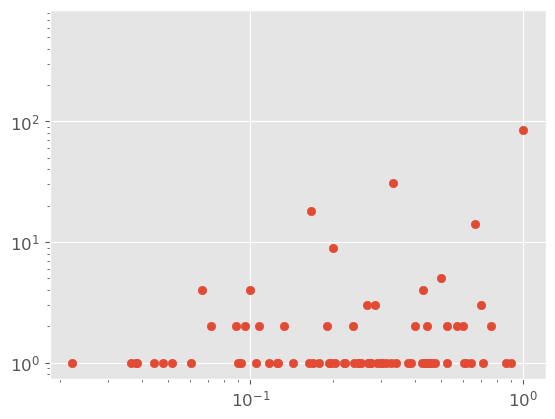

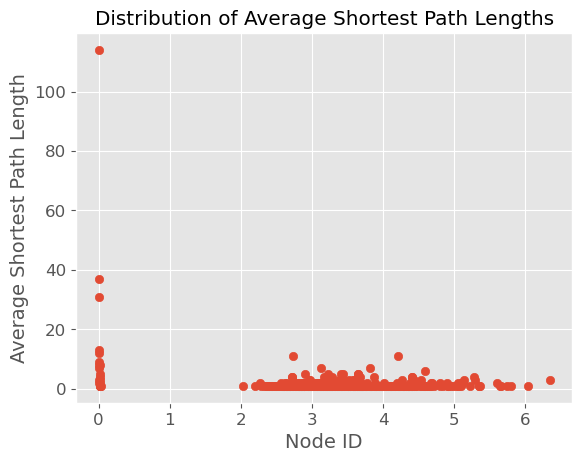

Average Statistics Time:
Degree Time: 0.40856
Connected Component Time: 0.29531
Cluster Coefficient Time: 0.35789
Shortest Path Length Time 0.85581
----------------------------------------------------------------------------------------


In [15]:
import snap
import matplotlib.pyplot as plt

datasets=['out.librec-filmtrust-trust']

for dataset in datasets:
    times = []
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    print(dataset)
    
    total_node_mem_usage = sum(sys.getsizeof(NI) for NI in G.Nodes())
    print("Total memory usage of nodes in graph:", total_node_mem_usage, "bytes")
    
    # Estimate memory usage of all edges
    total_edge_mem_usage = sum(sys.getsizeof(EI) for EI in G.Edges())
    print("Total memory usage of edges in graph:", total_edge_mem_usage, "bytes")
    
    

    start = time.time()
    degrees=[node.GetDeg() for node in G.Nodes()]
    # Plot the degree distribution using matplotlib as a scatter plot
    plot_distribution (degrees, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    
    #Connected_Components_Analysis
    start = time.time()
    plot_connected_components(G)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)


    #Clustering Coeffecient Analysis
    #Create a dictionary to store clustering coefficient for each node
    start = time.time()
    clust_coeff = {}
    # Iterate through all nodes in the graph
    for node in G.Nodes():
        # Get the clustering coefficient of the node
        c = snap.GetNodeClustCf(G, node.GetId())
        # Store the clustering coefficient in the dictionary
        clust_coeff[node.GetId()] = c
        Clust_Coff=list(clust_coeff.values())
        
    plot_distribution (Clust_Coff, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)

    #Shortest Path Analysis
    # Create a snap graph
    start = time.time()
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    # Calculate the average shortest path length for each node in the graph
    avg_shortest_path = shortPathLength(G)
    # Plot the distribution of average shortest path lengths
    plot_distribution_Short(avg_shortest_path, xlabel='Node ID', ylabel='Average Shortest Path Length', title='Distribution of Average Shortest Path Lengths')
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    print('Average Statistics Time:')
    print("Degree Time:",times[0])
    print("Connected Component Time:",times[1])
    print("Cluster Coefficient Time:",times[2])
    print("Shortest Path Length Time",times[3])
    print("----------------------------------------------------------------------------------------")

#### Software Network

out.subelj_jung-j_jung-j
Total memory usage of nodes in graph: 293760 bytes
Total memory usage of edges in graph: 2413920 bytes


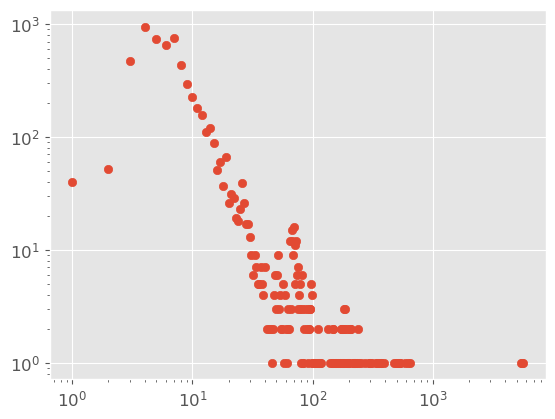

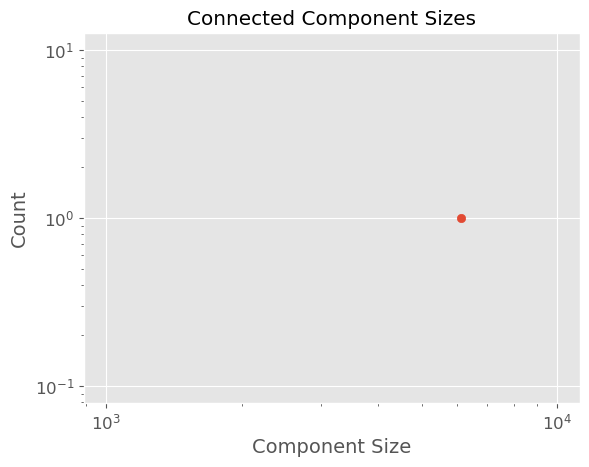

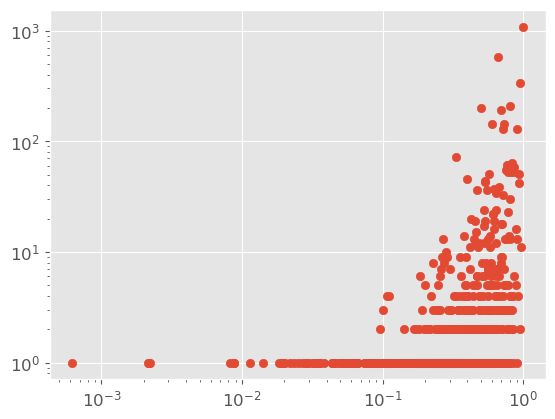

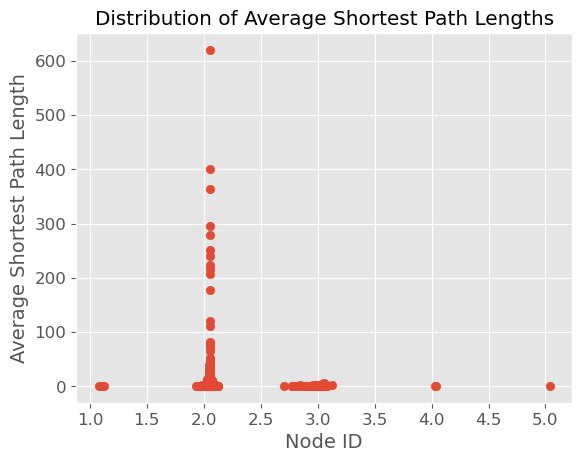

Average Statistics Time:
Degree Time: 0.45516
Connected Component Time: 0.33424
Cluster Coefficient Time: 1.058
Shortest Path Length Time 102.22948
----------------------------------------------------------------------------------------


In [17]:
import snap
import matplotlib.pyplot as plt

datasets=['out.subelj_jung-j_jung-j']

for dataset in datasets:
    times = []
    G = snap.LoadEdgeList(snap.PUNGraph, dataset,0,1)
    print(dataset)
    
    total_node_mem_usage = sum(sys.getsizeof(NI) for NI in G.Nodes())
    print("Total memory usage of nodes in graph:", total_node_mem_usage, "bytes")
    
    # Estimate memory usage of all edges
    total_edge_mem_usage = sum(sys.getsizeof(EI) for EI in G.Edges())
    print("Total memory usage of edges in graph:", total_edge_mem_usage, "bytes")
    
    
    
    start = time.time()
    degrees=[node.GetDeg() for node in G.Nodes()]
    # Plot the degree distribution using matplotlib as a scatter plot
    plot_distribution (degrees, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    
    #Connected_Components_Analysis
    start = time.time()
    plot_connected_components(G)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)


    #Clustering Coeffecient Analysis
    #Create a dictionary to store clustering coefficient for each node
    start = time.time()
    clust_coeff = {}
    # Iterate through all nodes in the graph
    for node in G.Nodes():
        # Get the clustering coefficient of the node
        c = snap.GetNodeClustCf(G, node.GetId())
        # Store the clustering coefficient in the dictionary
        clust_coeff[node.GetId()] = c
        Clust_Coff=list(clust_coeff.values())
        
    plot_distribution (Clust_Coff, xlabel='', ylabel='', title='', xlog = True, ylog= True, showLine=False, intAxis=False)
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)

    #Shortest Path Analysis
    # Create a snap graph
    start = time.time()
    G = snap.LoadEdgeList(snap.PUNGraph, dataset)
    # Calculate the average shortest path length for each node in the graph
    avg_shortest_path = shortPathLength(G)
    # Plot the distribution of average shortest path lengths
    plot_distribution_Short(avg_shortest_path, xlabel='Node ID', ylabel='Average Shortest Path Length', title='Distribution of Average Shortest Path Lengths')
    end = time.time()
    timing = np.round(end-start,5)
    times.append(timing)
    
    print('Average Statistics Time:')
    print("Degree Time:",times[0])
    print("Connected Component Time:",times[1])
    print("Cluster Coefficient Time:",times[2])
    print("Shortest Path Length Time",times[3])
    print("----------------------------------------------------------------------------------------")

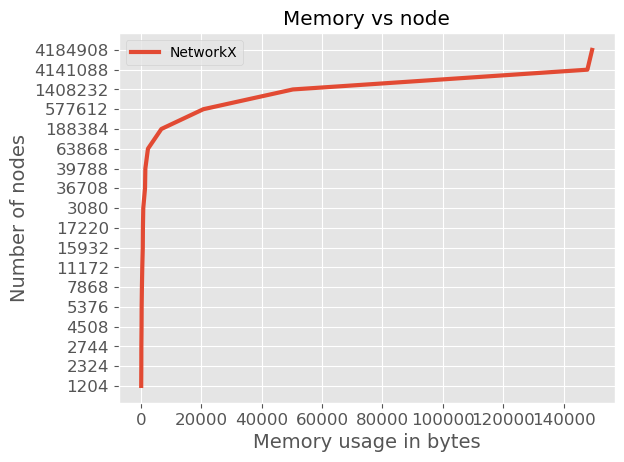

In [30]:
import matplotlib.pyplot as plt

# Defining the  dictionary and list 
dict1={ 
    83: '2324', 615 : '17220', 147896:'4141088',
    161:'4508', 728:'3080', 
    98:'2744',
    192:'5376',
    399: '11172', 43:'1204',
    149461:'4184908',
    20629:'577612',1421:'39788',
    6728:'188384', 2281:'63868',
    569:'15932', 281:'7868',
    1311:'36708',
    50294:'1408232'
}


# Extract x and y values for each dictionary
x = sorted(list(dict1.keys()))
y1 = [dict1[k] for k in x]


# Plot the lines
plt.plot(x, y1, label='NetworkX')

# Add axis labels, title and legend
plt.xlabel('Memory usage in bytes')
plt.ylabel('Number of nodes')
plt.title('Memory vs node')
plt.legend()

# Show the plot
plt.show()


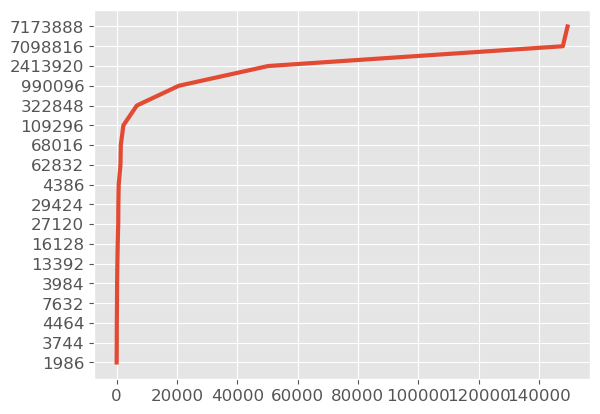

In [35]:
dict2 = {
    83:'3744',615:'29424',147896:'7098816',
    161:'7632',728:'4386',
    98:'4464',
    192:'3984',
    399:'16128',43:'1986',
    149461:'7173888',
    20629:'990096',1421:'68016',
    6728:'322848', 2281:'109296',
    569:'27120',281:'13392',
    1311:'62832',
    50294:'2413920'
}

x = sorted(list(dict1.keys()))
y = [dict2[k] for k in x]
#plt.yticks([round(i, 1) for i in plt.yticks()[0]])
plt.plot(x, y, label='snap.py')